In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import re
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

Loading a database

In [51]:
train_db = pd.read_csv("C:/Users/zuzia/Desktop/Coding/Python/semestr V/Deep Learning in Theory and Applications/Fake News Classification/archive (1)/train (2).csv", sep=";")

In [52]:
test_db = pd.read_csv("C:/Users/zuzia/Desktop/Coding/Python/semestr V/Deep Learning in Theory and Applications/Fake News Classification/archive (1)/test (1).csv", sep=";")

In [53]:
evaluation_db = pd.read_csv("C:/Users/zuzia/Desktop/Coding/Python/semestr V/Deep Learning in Theory and Applications/Fake News Classification/archive (1)/evaluation.csv", sep=";")

In [54]:
db = pd.concat([train_db, test_db, evaluation_db], ignore_index=True) #deletes indexes and creates new one to prevent any mistakes

Database analysis

In [6]:
db.head()

,Unnamed: 0,title,text,label
0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0
3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0


In [7]:
db.shape #40587 records

(40587, 4)

In [8]:
db.dtypes

Unnamed: 0     int64
title         object
text          object
label          int64
dtype: object

In [9]:
db.nunique() #the number of unique values

Unnamed: 0    24353
title         39997
text          40585
label             2
dtype: int64

In [10]:
db.label.value_counts() #21924 true articles and 18663 fake news

label
1    21924
0    18663
Name: count, dtype: int64

In [11]:
db.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [39]:
db = db.drop(columns=['Unnamed: 0'])

In [13]:
db.head()

,title,text,label
0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0
3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0


In [14]:
db.shape #40587 records

(40587, 3)

In [15]:
db.dtypes

title    object
text     object
label     int64
dtype: object

In [16]:
db.nunique() #the number of unique values

title    39997
text     40585
label        2
dtype: int64

Division of Real and Fake News

In [79]:
labels = ['Real','Fake']
values = db['label'].value_counts()
colors = ['#5c97e6','#ed5e4e']

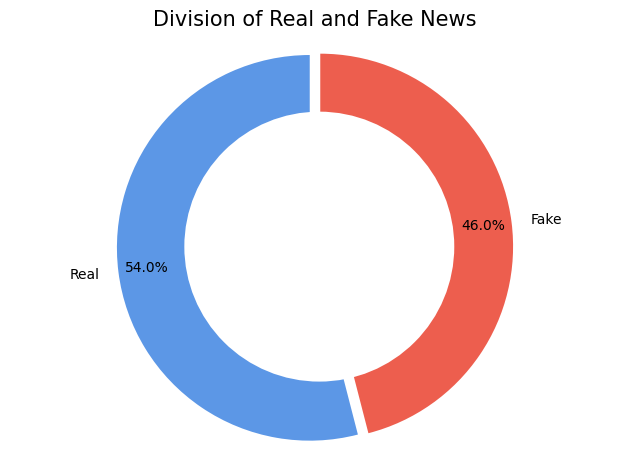

In [85]:
fig1, ax1 = plt.subplots()
plt.pie(values, colors = colors, labels = labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = (0.05, 0.005))#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
ax1.set_title("Division of Real and Fake News", 
              fontdict = {'fontsize' : 15,
                          'fontweight' : 10},
              loc = 'center')
plt.tight_layout()
plt.show()

Most frequent words in Titles and Text

In [18]:
def textAnalysis(text):
    text = re.sub(r'W+', ' ', text) #removes the non-alphanumeric characters
    t = text.lower().split() #puts everything in lowercase ad splits into words
    spam = ['is', 's', 'are', 're', 'with', 'for', 'in', 'on', 'the', 'a', 'and', 'to', 'of']
    return [word for word in t if word not in spam]

In [19]:
title_words = db['title'].dropna().apply(textAnalysis).sum()

In [20]:
text_words = db['text'].dropna().apply(textAnalysis).sum()

In [21]:
title_counter = Counter(title_words).most_common(20)

In [22]:
text_counter = Counter(text_words).most_common(20)

In [23]:
title_frequency = pd.DataFrame(title_counter, columns=['word', 'frequency'])

In [24]:
text_frequency = pd.DataFrame(text_counter, columns=['word', 'frequency'])

In [64]:
def frequencyPlot(frequency):
    sns.barplot(data=frequency, x='word', y='frequency')
    plt.title('Top 20 most frequent words')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()

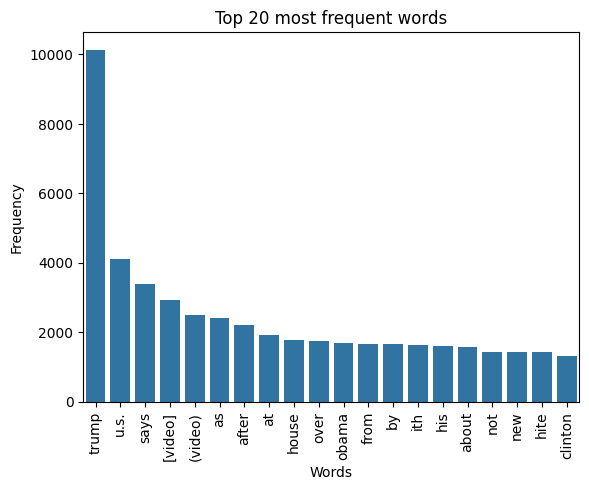

In [65]:
#titles
frequencyPlot(title_frequency)

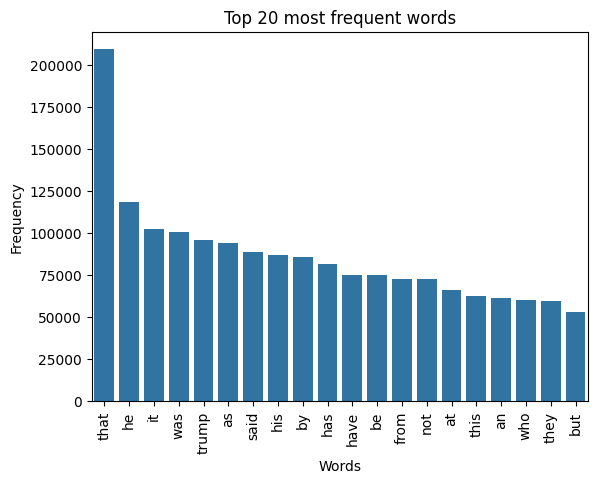

In [66]:
#text
frequencyPlot(text_frequency)

In [28]:
#the plots helped to eliminate spam words

Feature Extraction - Term Frequency-Inverse Document Frequency and Principle Component Analysis

In [29]:
#helps identify words that are more likely to appear in fake or real news articles

In [30]:
tfidf = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf.fit_transform(db['text'].fillna(''))

In [31]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

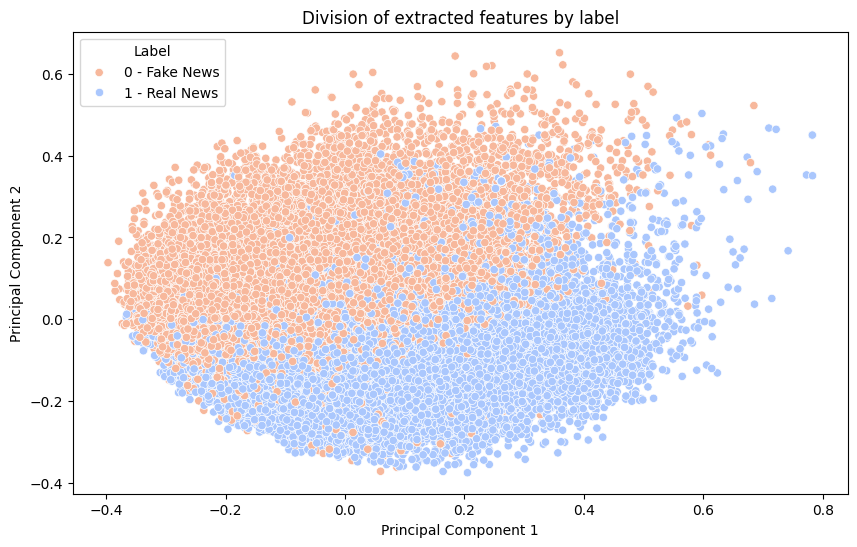

In [63]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=db['label'], palette='coolwarm')
plt.title('Division of extracted features by label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Label', labels=["0 - Fake News","1 - Real News"])
plt.show()

In [33]:
#now we can say that there are words that are most frequent in either fake or real news, which allows us to find them
#and use these  key terms as features to build an accurate classification model

In [34]:
fake_news = db[db['label'] == 0]  
real_news = db[db['label'] == 1]

In [35]:
fake_news_cleaned = fake_news['text'].dropna().apply(textAnalysis)
real_news_cleaned = real_news['text'].dropna().apply(textAnalysis)

In [36]:
#joining the cleaned words back into a single string bc TfidfVectorizer requires string input
fake_news_joined = fake_news_cleaned.apply(lambda x: ' '.join(x)) 
real_news_joined = real_news_cleaned.apply(lambda x: ' '.join(x)) 

In [37]:
#applying tfidf
fake_tfidf_matrix = tfidf.transform(fake_news_joined.fillna(''))  
real_tfidf_matrix = tfidf.transform(real_news_joined.fillna(''))  

In [38]:
#summing the tfidf values for each word in fake and real news
fake_word_frequencies = np.asarray(fake_tfidf_matrix.sum(axis=0)).flatten()
real_word_frequencies = np.asarray(real_tfidf_matrix.sum(axis=0)).flatten()

In [39]:
feature_names = np.array(tfidf.get_feature_names_out())

In [40]:
#getting the top 20 most common words for fake and real news
fake_top_words_idx = fake_word_frequencies.argsort()[::-1][:20]
real_top_words_idx = real_word_frequencies.argsort()[::-1][:20]

In [41]:
fake_top_words = feature_names[fake_top_words_idx]
fake_top_frequencies = fake_word_frequencies[fake_top_words_idx]

In [42]:
real_top_words = feature_names[real_top_words_idx]
real_top_frequencies = real_word_frequencies[real_top_words_idx]

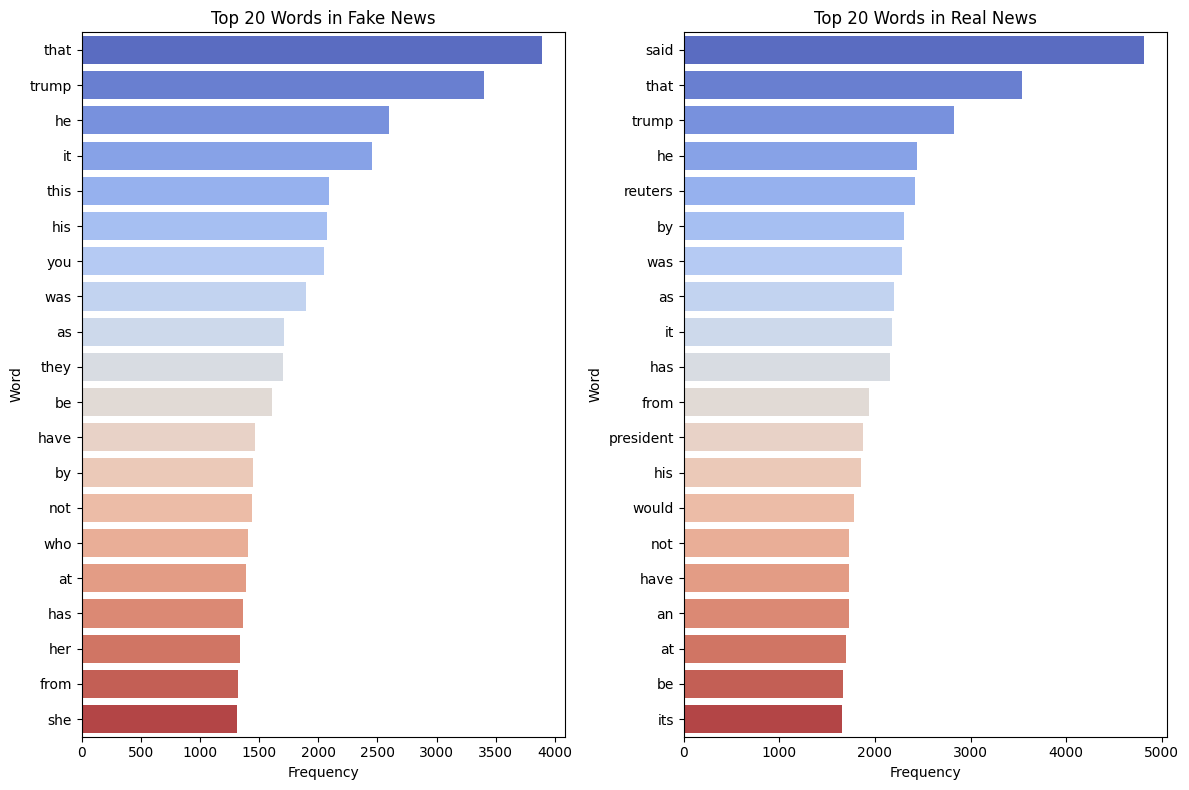

In [43]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.barplot(x=fake_top_frequencies, y=fake_top_words, hue=fake_top_words, palette='coolwarm', legend=False)
plt.title('Top 20 Words in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Word')

plt.subplot(1, 2, 2)
sns.barplot(x=real_top_frequencies, y=real_top_words, hue=real_top_words, palette='coolwarm', legend=False)
plt.title('Top 20 Words in Real News')
plt.xlabel('Frequency')
plt.ylabel('Word')

plt.tight_layout()
plt.show()

Co-Occurence frequencies of words in Titles

In [67]:
true_titles = db.loc[db['label'] == 1, 'title'].dropna()

In [68]:
#creating a CountVectorizer to get word pairs (bigrams) from the titles
vectorizer = CountVectorizer(stop_words='english', max_features = 20)  
X = vectorizer.fit_transform(true_titles)

In [69]:
co_occurrence_matrix = (X.T * X)  #matrix multiplication to get co-occurrences
co_occurrence_matrix.setdiag(0)

In [70]:
words = vectorizer.get_feature_names_out()
co_occurrence_df = pd.DataFrame(co_occurrence_matrix.toarray(), index=words, columns=words)

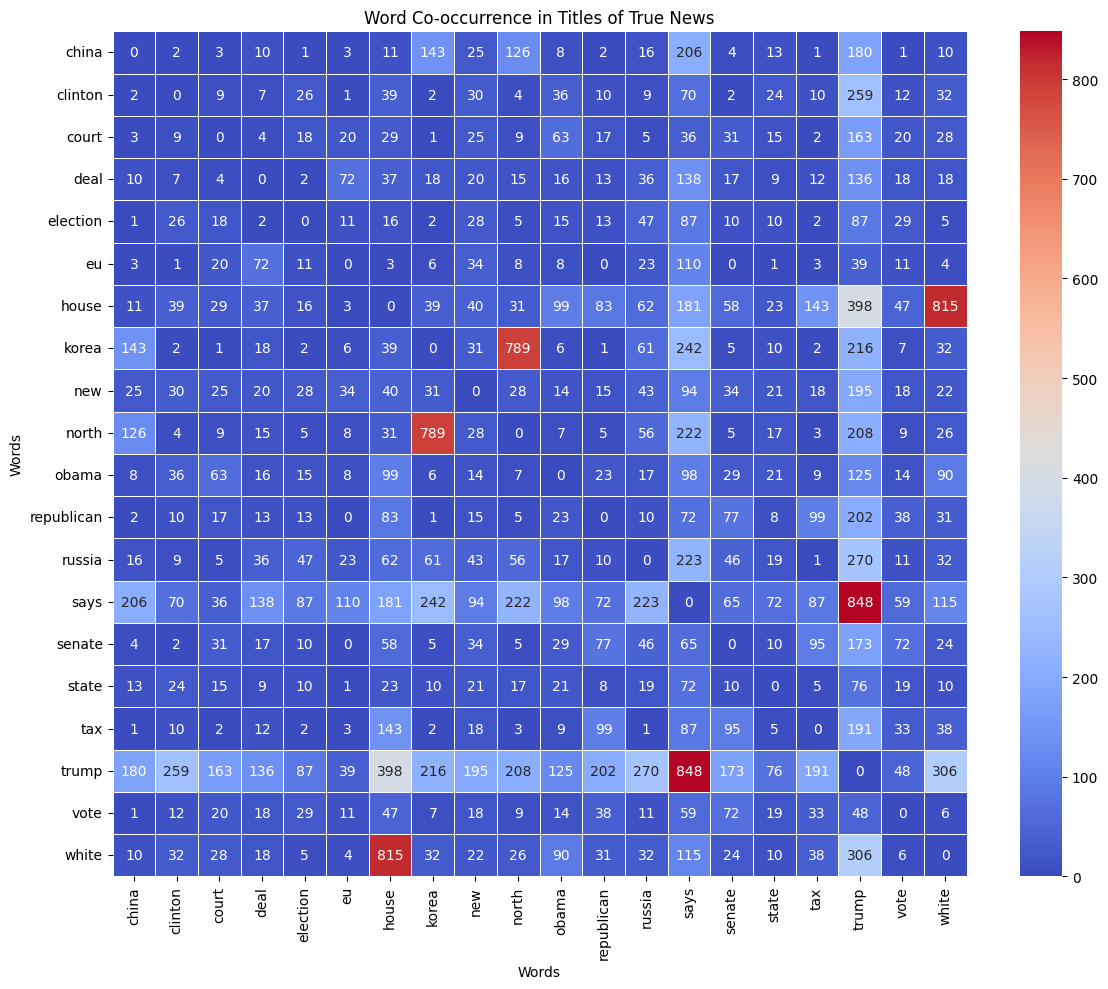

In [72]:
plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence_df, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5)
plt.title("Word Co-occurrence in Titles of True News")
plt.xlabel("Words")
plt.ylabel("Words")
plt.tight_layout()
plt.show()

In [74]:
fake_titles = db.loc[db['label'] == 0, 'title'].dropna()

In [75]:
#creating a CountVectorizer to get word pairs (bigrams) from the titles
vectorizer = CountVectorizer(stop_words='english', max_features = 20)  
X = vectorizer.fit_transform(fake_titles)

In [76]:
co_occurrence_matrix = (X.T * X)  #matrix multiplication to get co-occurrences
co_occurrence_matrix.setdiag(0)

In [77]:
words = vectorizer.get_feature_names_out()
co_occurrence_df = pd.DataFrame(co_occurrence_matrix.toarray(), index=words, columns=words)

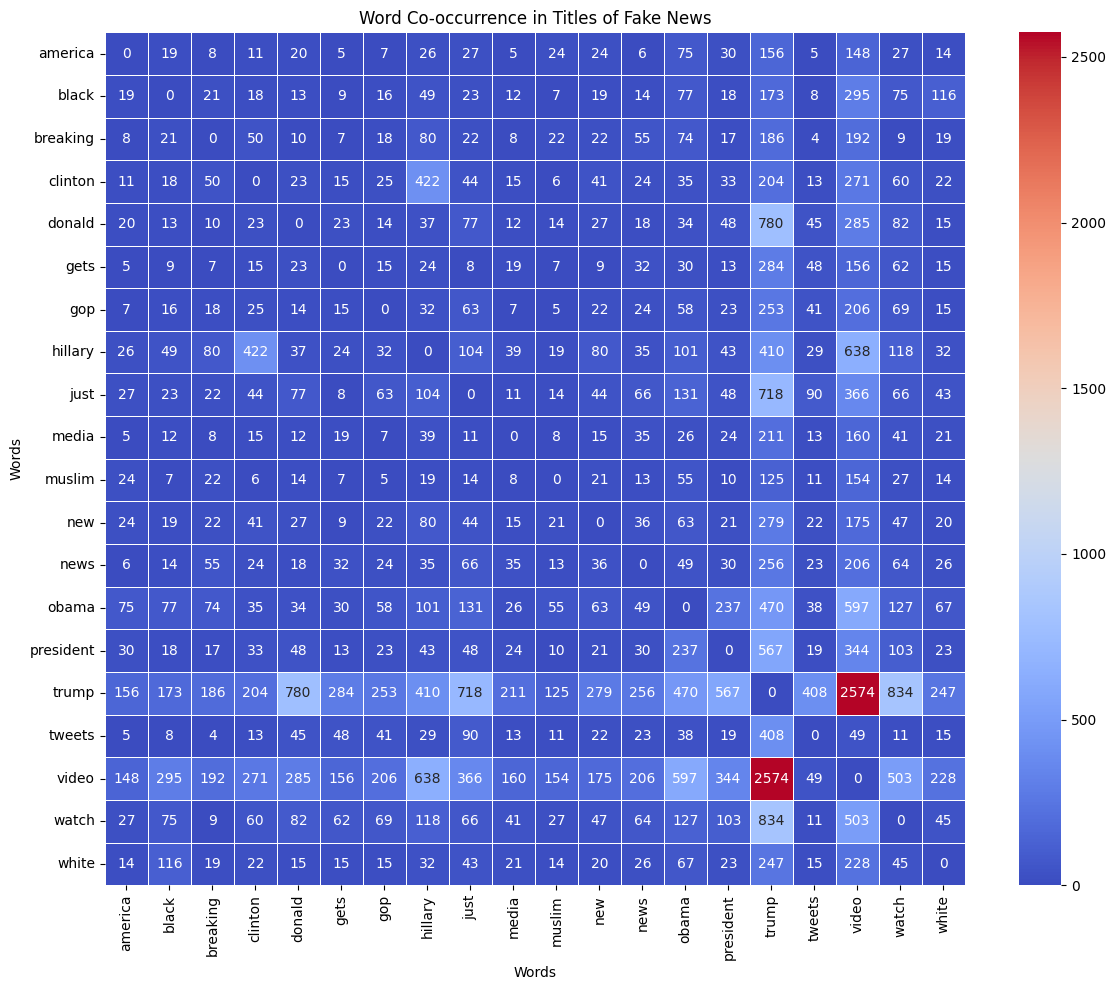

In [78]:
plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence_df, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5)
plt.title("Word Co-occurrence in Titles of Fake News")
plt.xlabel("Words")
plt.ylabel("Words")
plt.tight_layout()
plt.show()

In [86]:
#the majority of fake news is about trump while real news concern other issues eg north korea, white house

Classifications

In [55]:
db['text'] = db['text'].str.lower()
db['title'] = db['title'].str.lower()

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Add
from tensorflow.keras.models import Model

db['content'] = db['title'] + " " + db['text']

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(db['content']).toarray()
y = db['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

K-Nearest Neighbors - KNN

In [42]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8534121704853412
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      3698
           1       0.83      0.92      0.87      4420

    accuracy                           0.85      8118
   macro avg       0.86      0.85      0.85      8118
weighted avg       0.86      0.85      0.85      8118



Multilayer Perceptron with Dropout

In [44]:
mlp_dropout = Sequential()
mlp_dropout.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
mlp_dropout.add(Dropout(0.5))
mlp_dropout.add(Dense(64, activation='relu'))
mlp_dropout.add(Dropout(0.5))
mlp_dropout.add(Dense(1, activation='sigmoid'))
mlp_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_dropout.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=1)
mlp_dropout_score = mlp_dropout.evaluate(X_test, y_test, verbose=0)
print("MLP with Dropout Accuracy:", mlp_dropout_score[1])

Epoch 1/5
914/914 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9140 - loss: 0.2539 - val_accuracy: 0.9781 - val_loss: 0.0573
Epoch 2/5
914/914 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9857 - loss: 0.0452 - val_accuracy: 0.9769 - val_loss: 0.0560
Epoch 3/5
914/914 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9916 - loss: 0.0252 - val_accuracy: 0.9791 - val_loss: 0.0582
Epoch 4/5
914/914 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9937 - loss: 0.0189 - val_accuracy: 0.9778 - val_loss: 0.0639
Epoch 5/5
914/914 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9950 - loss: 0.0153 - val_accuracy: 0.9797 - val_loss: 0.0735
MLP with Dropout Accuracy: 0.9731460809707642


Residual Neural Network - ResNet

In [45]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Add, Activation
from tensorflow.keras.optimizers import Adam

def build_resnet(input_shape):
    inputs = Input(shape=input_shape)
    x = Dense(128, activation='relu')(inputs)
    x = BatchNormalization()(x)  
    x = Dense(128)(x)
    shortcut = Dense(128)(inputs)
    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

resnet_model = build_resnet((X_train.shape[1],))
resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
resnet_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=1)

resnet_score = resnet_model.evaluate(X_test, y_test, verbose=0)
print("ResNet Accuracy:", resnet_score[1])


Epoch 1/5
914/914 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9417 - loss: 0.1572 - val_accuracy: 0.9744 - val_loss: 0.0678
Epoch 2/5
914/914 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9878 - loss: 0.0347 - val_accuracy: 0.9729 - val_loss: 0.0746
Epoch 3/5
914/914 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9945 - loss: 0.0169 - val_accuracy: 0.9738 - val_loss: 0.0864
Epoch 4/5
914/914 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9968 - loss: 0.0101 - val_accuracy: 0.9741 - val_loss: 0.0837
Epoch 5/5
914/914 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9978 - loss: 0.0072 - val_accuracy: 0.9794 - val_loss: 0.1082
ResNet Accuracy: 0.9733924865722656


In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier

X = db['content']
y = db['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

Multilayer Perceptron - MLP

In [48]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=300, random_state=42)
mlp.fit(X_train_tfidf, y_train)
y_pred_mlp = mlp.predict(X_test_tfidf)
print("MLP Classifier Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

MLP Classifier Accuracy: 0.9687115052968711
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3698
           1       0.97      0.97      0.97      4420

    accuracy                           0.97      8118
   macro avg       0.97      0.97      0.97      8118
weighted avg       0.97      0.97      0.97      8118

